In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
import seaborn as sns
import math

In [42]:
"Assignment- 4 - Task-5"

'Assignment- 4 - Task-5'

In [43]:
x1 = [1,2,2,0,1,0]
x2 = [1,2,0,0,0,1]
cls = ['+','+','+','-','-','-']

In [44]:
dict = {"class":cls,"x1":x1,"x2":x2}

In [45]:
df = pd.DataFrame(dict)

In [46]:
df

,class,x1,x2
0,+,1,1
1,+,2,2
2,+,2,0
3,-,0,0
4,-,1,0
5,-,0,1


In [47]:
datapoints = df[['x1','x2']].values
y = df['class'].values

In [48]:
datapoints

array([[1, 1],
       [2, 2],
       [2, 0],
       [0, 0],
       [1, 0],
       [0, 1]], dtype=int64)

In [49]:
y

array(['+', '+', '+', '-', '-', '-'], dtype=object)

C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


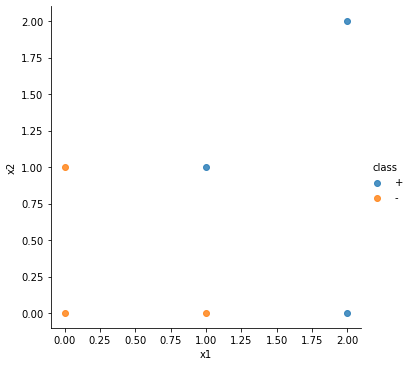

In [50]:
sns.lmplot('x1','x2',data = df, hue='class',fit_reg = False);

In [51]:
C = [1.0,2.0,3.0]

C =  1.0
MaxMargin =  1.5811388300841893
Weight(W)=  [-1.2 -0.4]
Bias(b)= 1.4
Support Vectors =  [[1. 1.]
 [2. 0.]
 [1. 0.]
 [0. 1.]]
Plane Slope = -3.0000000000000004


C:\Users\rakes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


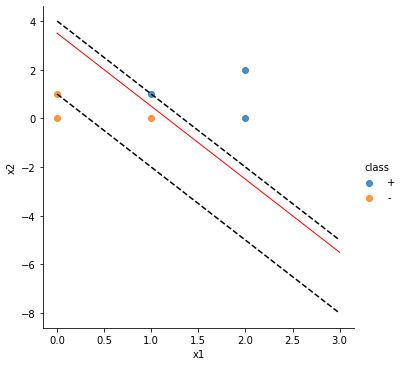

In [52]:
Weight = list()
bias = list()
MaxMargin = 0
slope =0
for j in C:
    Model = svm.SVC(C = j, kernel = 'linear')
    Model.fit(datapoints,y)
    W = Model.coef_[0]
    sum = 0
    for i in W:
        sum = sum + i*i;
    w = math.sqrt(sum)
    Margin = 2 / w;
    
    if(MaxMargin < Margin):
        print("C = ", j)
        print("MaxMargin = ", Margin)
        MaxMargin = Margin
        Weight.append(W)
        b = Model.intercept_[0]
        bias.append(b)
        print("Weight(W)= ", W)
        print("Bias(b)=", b)
        print("Support Vectors = ",Model.support_vectors_)
        s = -W[0]/W[1]
        print("Plane Slope =", s)
        slope = s
W = Weight[0]
b = bias[0]
X = np.linspace(0,3)
Y = slope* X - (b/W[1])
  
s1 = Model.support_vectors_[0]
Y_down = slope* X + (s1[1] - slope*s1[0])
 
s2 = Model.support_vectors_[3]
Y_up = slope* X + (s2[1] - slope*s2[0])
   
    
    
sns.lmplot('x1','x2',data = df, hue='class',fit_reg = False);
plt.plot(X,Y, linewidth = 1, color = 'red')
plt.plot(X,Y_down, 'k--')
plt.plot(X,Y_up,'k--')

In [53]:
"Task-6"

'Task-6'

In [69]:
# datapoints for 3D feature space
datapoints = np.array([[1,0,0],[1,1.414,1],[1, -1.414,1]])
Y = np.array(['+','-','-']) 
model = svm.SVC(kernel = 'linear', C =1.5)
model.fit(datapoints,Y)

SVC(C=1.5, kernel='linear')

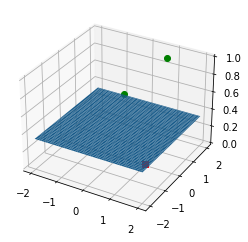

In [83]:
temp = np.linspace(-2,2,100)
x,y = np.meshgrid(temp,temp)
fig = plt.figure()
afig = fig.add_subplot(projection = '3d')
afig.plot_surface(x,y, (-model.intercept_[0]-model.coef_[0][0]*x-model.coef_[0][1]*y)/model.coef_[0][2])
afig.plot3D(datapoints[Y == '-',0], datapoints[Y == '-',1], datapoints[Y == '-',2],'og')
afig.plot3D(datapoints[Y == '+',0], datapoints[Y == '+',1], datapoints[Y == '+',2],'sr')

               
plt.show()